### 連線至雲端硬碟 讀取111年偏遠地區學校資訊


In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import os
os.chdir("/content/gdrive/My Drive/")
!ls -l"/content/gdrive/My Drive/latia/"

import pandas as pd

csv_file = './latia/faraway111.csv'

Mounted at /content/gdrive/
ls: invalid option -- '/'
Try 'ls --help' for more information.


### check if there is null


In [2]:
df = pd.read_csv(csv_file, encoding='utf-8')
# df
print(df.info(verbose=True, show_counts=True))
# print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   學年度       1138 non-null   int64  
 1   縣市名稱      1138 non-null   object 
 2   鄉鎮市區      1138 non-null   object 
 3   學生等級      1138 non-null   object 
 4   學校代碼      1138 non-null   int64  
 5   學校名稱      1138 non-null   object 
 6   公/私立      1138 non-null   object 
 7   地區屬性      1138 non-null   object 
 8   地址        1138 non-null   object 
 9   電話        1138 non-null   object 
 10  網址        1138 non-null   object 
 11  班級數       1138 non-null   int64  
 12  男學生數      1138 non-null   int64  
 13  女學生數      1138 non-null   int64  
 14  原住民學生比率   1138 non-null   float64
 15  上學年男畢業生數  1138 non-null   int64  
 16  上學年女畢業生數  1138 non-null   int64  
dtypes: float64(1), int64(7), object(9)
memory usage: 151.3+ KB
None


### cell for font

In [10]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-03-15 13:27:46--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.194.101, 173.194.194.139, 173.194.194.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.194.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-03-15 13:27:46--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.126.132, 2607:f8b0:4001:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  24.0MB/s    in 0.8s    

2024-03-15 13

### Q1. 各縣市各有多少間偏遠學校？

In [27]:
df['縣市名稱'] = df['縣市名稱'].str.split(']').str[-1]
faraway_per_city = df.groupby('縣市名稱')['學校名稱'].nunique()

# print(faraway_per_city.info(verbose=True, show_counts=True))
print(f"全部共搜集了 {faraway_per_city.sum()} 間偏遠學校")
for i in range(len(faraway_per_city)):
  print(f"{faraway_per_city.index[i]} 有 {faraway_per_city[i]} 所")

全部共搜集了 1138 間偏遠學校
南投縣 有 103 所
嘉義縣 有 92 所
宜蘭縣 有 19 所
屏東縣 有 94 所
彰化縣 有 63 所
新北市 有 58 所
新竹縣 有 37 所
桃園市 有 30 所
澎湖縣 有 51 所
臺中市 有 48 所
臺南市 有 109 所
臺東縣 有 82 所
花蓮縣 有 82 所
苗栗縣 有 51 所
連江縣 有 12 所
金門縣 有 24 所
雲林縣 有 111 所
高雄市 有 72 所


### Graph for Q1





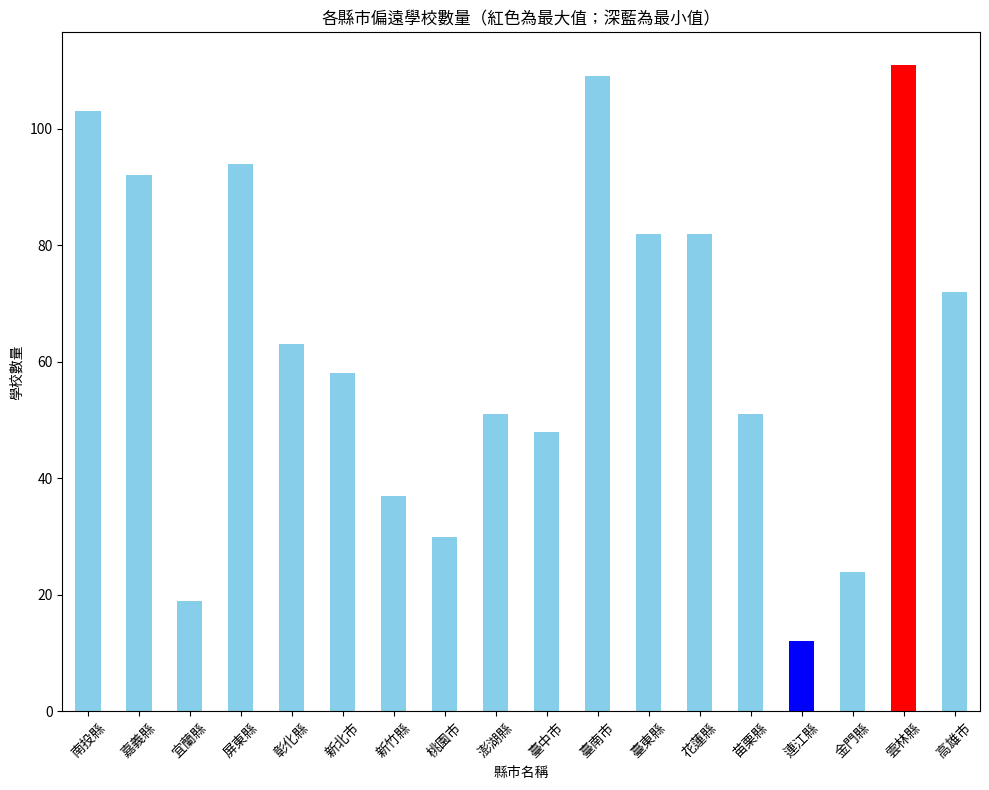

In [35]:
max_schools = faraway_per_city.max()
min_schools = faraway_per_city.min()

# Assign colors based on the max and min values
colors = ['red' if schools == max_schools else 'blue' if schools == min_schools else 'skyblue' for schools in faraway_per_city]

# Plotting
plt.figure(figsize=(10, 8))
faraway_per_city.plot(kind='bar', color=colors)
plt.title('各縣市偏遠學校數量（紅色為最大值；深藍為最小值）')
plt.xlabel('縣市名稱')
plt.ylabel('學校數量')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### Q2. 所有學校每班平均有多少名學生，以及這個數字按市區有怎樣的變化？

In [32]:
# Assuming 'df' is your DataFrame containing the school data

# First, calculate the total number of students per school
df['學生總數'] = df['男學生數'] + df['女學生數']

# Calculate the average number of students per class for each school
df['每班平均學生數'] = df['學生總數'] / df['班級數']

# Overall average number of students per class across all schools
overall_avg_students_per_class = df['每班平均學生數'].mean()

# Average number of students per class by district
avg_students_per_class_by_district = df.groupby('縣市名稱')['每班平均學生數'].mean()

print(f"所有學校平均每班有: {overall_avg_students_per_class:.2f} 位學生")
print("而依照縣市區分的話：")

for name, value in avg_students_per_class_by_district.items():
    clean_name = name.split(']')[-1] if ']' in name else name  # Safely remove prefix if present
    print(f"{clean_name} 平均每班有 {value:.2f} 位學生")


所有學校平均每班有: 10.98 位學生
而依照縣市區分的話：
南投縣 平均每班有 10.19 位學生
嘉義縣 平均每班有 8.32 位學生
宜蘭縣 平均每班有 10.73 位學生
屏東縣 平均每班有 14.59 位學生
彰化縣 平均每班有 13.58 位學生
新北市 平均每班有 10.54 位學生
新竹縣 平均每班有 11.88 位學生
桃園市 平均每班有 9.94 位學生
澎湖縣 平均每班有 9.91 位學生
臺中市 平均每班有 10.45 位學生
臺南市 平均每班有 11.40 位學生
臺東縣 平均每班有 10.33 位學生
花蓮縣 平均每班有 9.04 位學生
苗栗縣 平均每班有 9.38 位學生
連江縣 平均每班有 10.53 位學生
金門縣 平均每班有 16.46 位學生
雲林縣 平均每班有 11.52 位學生
高雄市 平均每班有 10.81 位學生


### Graph for Q2

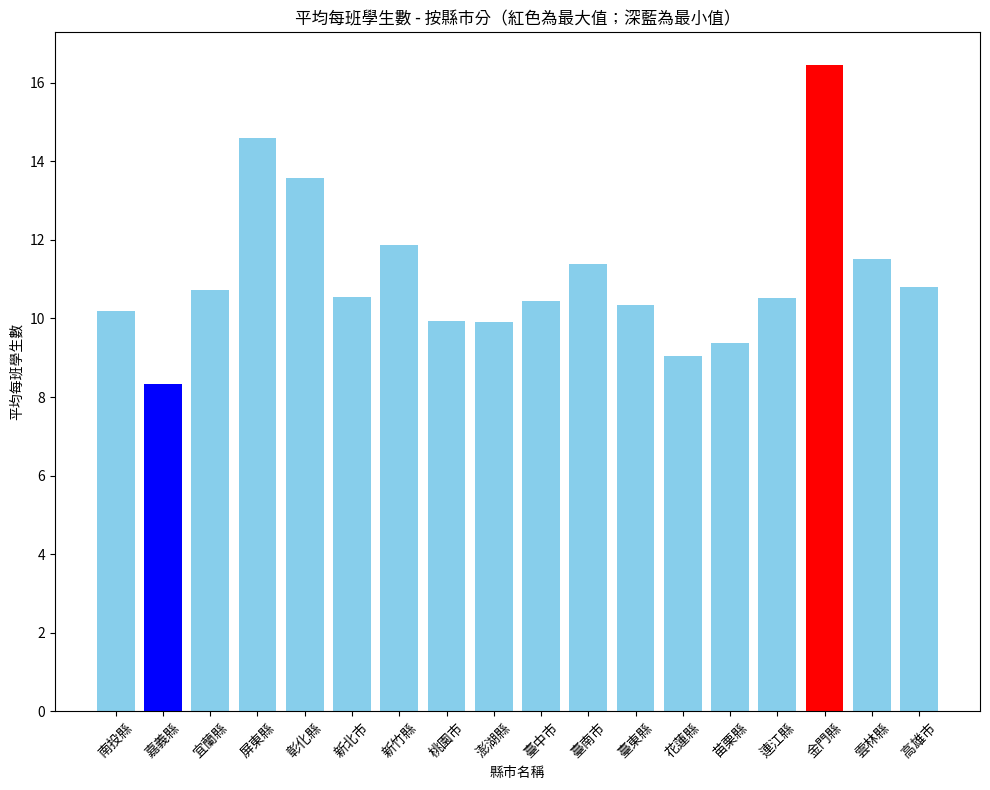

In [36]:

# 找出最大值和最小值
max_value = avg_students_per_class_by_district.max()
min_value = avg_students_per_class_by_district.min()

# 設置顏色：如果值是最大或最小，設置為紅色或藍色，否則為天藍色
colors = ['red' if value == max_value else 'blue' if value == min_value else 'skyblue' for value in avg_students_per_class_by_district]

# 繪製長條圖
plt.figure(figsize=(10, 8))
plt.bar(avg_students_per_class_by_district.index, avg_students_per_class_by_district, color=colors)

# 添加標題和軸標籤
plt.title('平均每班學生數 - 按縣市分（紅色為最大值；深藍為最小值）')
plt.xlabel('縣市名稱')
plt.ylabel('平均每班學生數')
plt.xticks(rotation=45)
plt.tight_layout()

# 顯示圖表
plt.show()


### Q3. 各縣市的地區屬性組成為何？（偏遠?% 特偏 ?%極偏?%)



In [37]:

attr_count = df.groupby(['縣市名稱', '地區屬性']).size().unstack(fill_value=0)

# 計算每種地區屬性的百分比
attr_percentage = attr_count.div(attr_count.sum(axis=1), axis=0) * 100

# 顯示結果
attr_percentage


地區屬性,偏遠,極偏,特偏
縣市名稱,,,
南投縣,59.223301,26.213592,14.563107
嘉義縣,72.826087,18.478261,8.695652
宜蘭縣,63.157895,21.052632,15.789474
屏東縣,60.638298,17.021277,22.340426
彰化縣,100.000000,0.000000,0.000000
新北市,87.931034,1.724138,10.344828
新竹縣,72.972973,13.513514,13.513514
桃園市,73.333333,0.000000,26.666667
澎湖縣,33.333333,1.960784,64.705882


### Graph for Q3

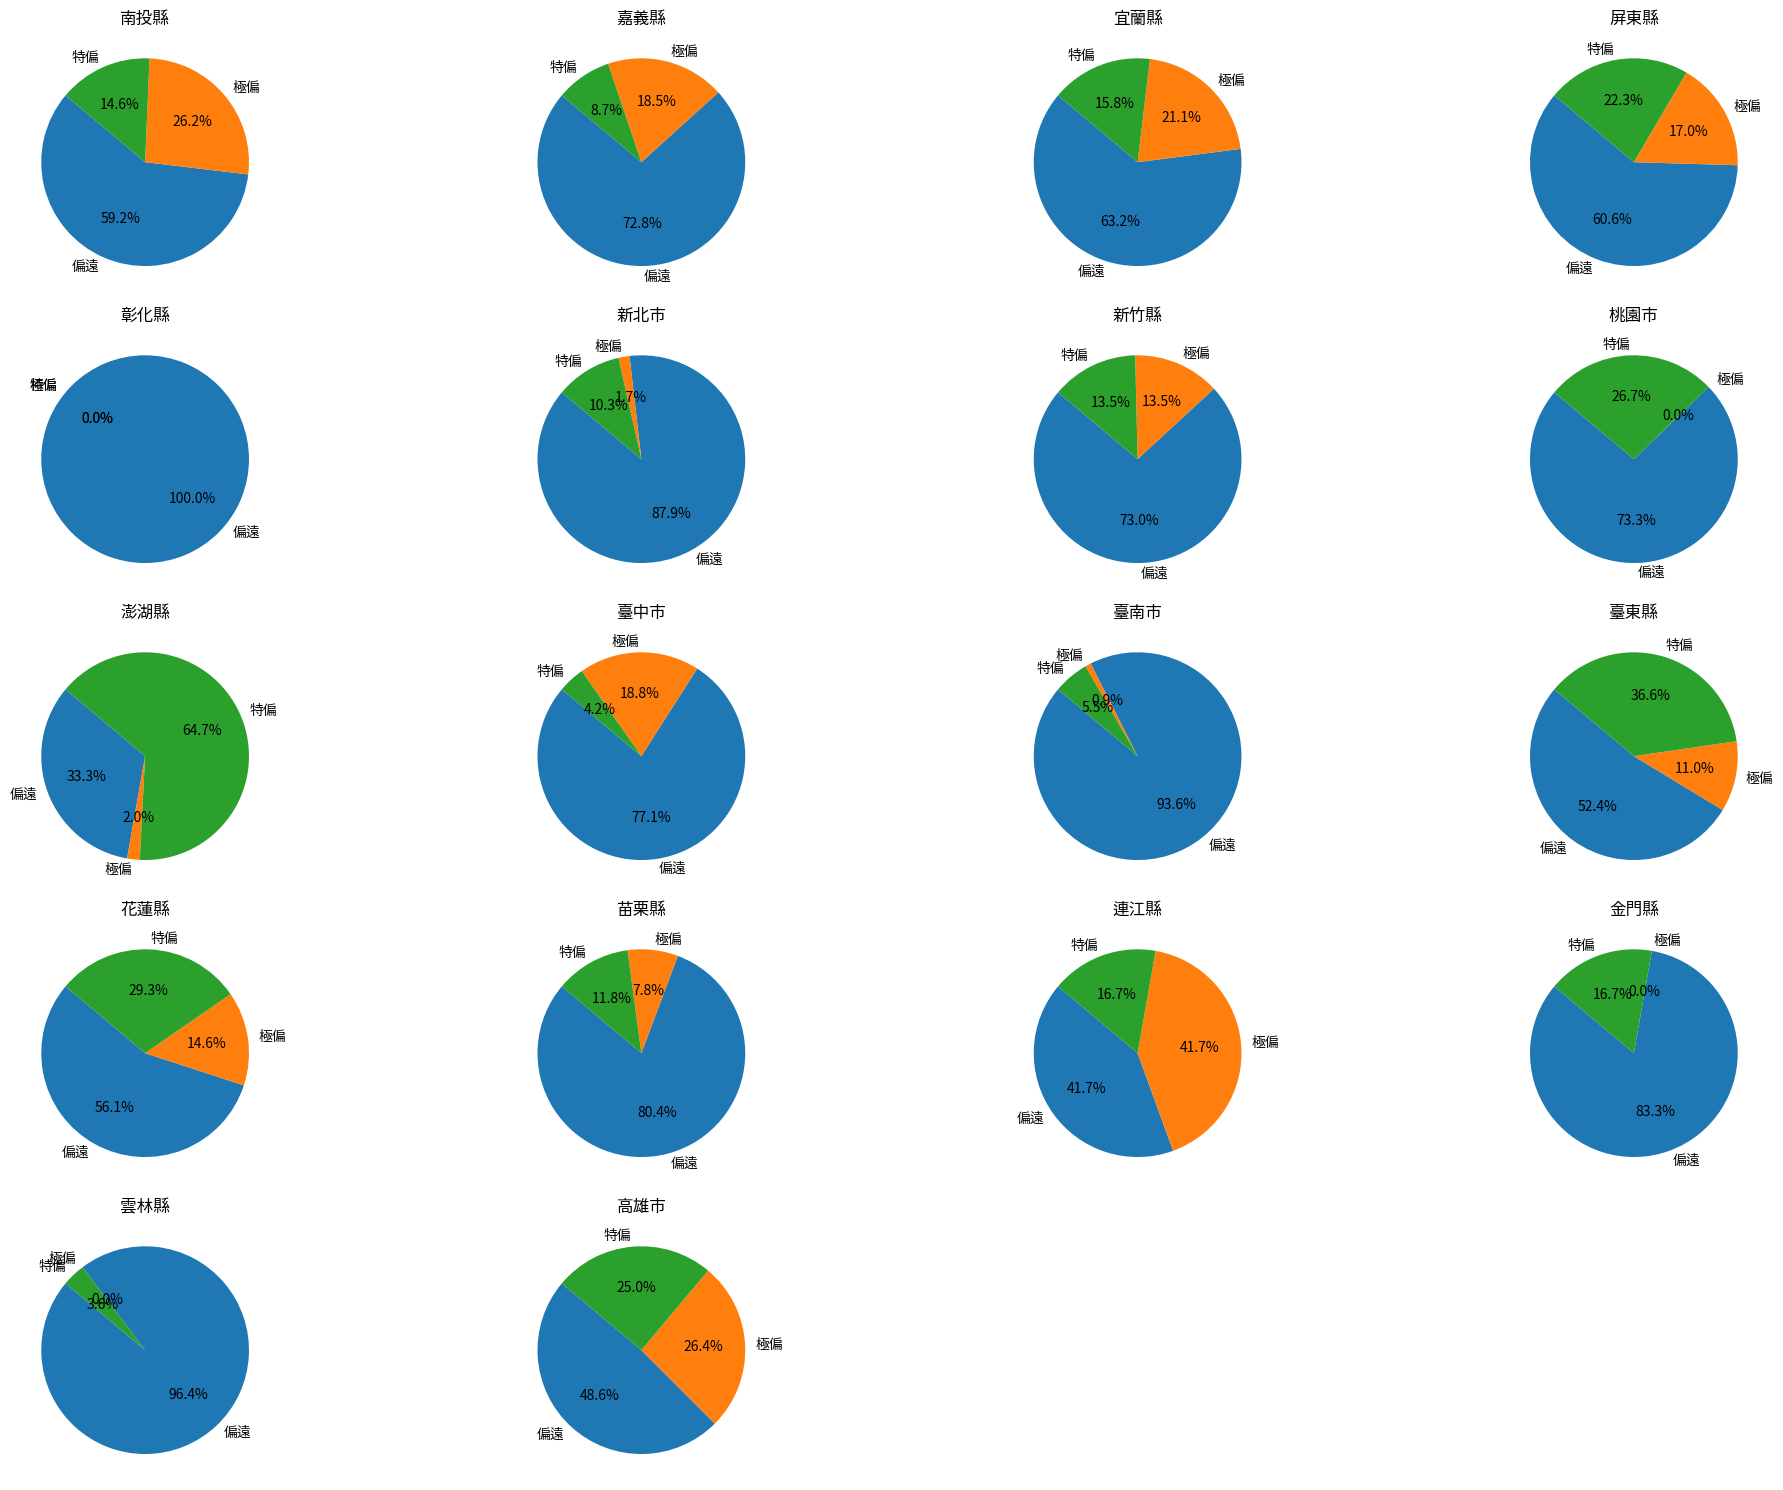

In [39]:

# 設置繪圖大小
plt.figure(figsize=(20, 15))

# 計算需要繪製的圓餅圖數量（即縣市數量），以及適合的排列方式
n_cities = attr_percentage.shape[0]
n_cols = 4  # 每行顯示 3 個圓餅圖
n_rows = (n_cities + n_cols - 1) // n_cols  # 確保有足夠的行數來顯示所有圓餅圖

for i, (city, row) in enumerate(attr_percentage.iterrows(), 1):
    plt.subplot(n_rows, n_cols, i)  # 為當前縣市選擇適當的子圖位置
    # 繪製圓餅圖，使用 row.values 作為數據，地區屬性名稱作為標籤
    plt.pie(row, labels=row.index, autopct='%1.1f%%', startangle=140)
    plt.title(city)  # 將縣市名稱設為圓餅圖的標題

plt.tight_layout()  # 調整子圖間距
plt.show()  # 顯示圖表


### Q4. 偏遠學校中，國小和國中的組成比例為何？

In [44]:

df['學校類型'] = df['學校名稱'].apply(lambda x: '國中' if '國中' in x else '國小')

# 計算各類型學校的數量
school_type_counts = df['學校類型'].value_counts()

# 計算比例
total_schools = school_type_counts.sum()
school_type_ratios = school_type_counts / total_schools * 100

for school_type, ratio in school_type_ratios.items():
    print(f"{school_type} 佔了 {ratio:.2f}% 的比例。")


國小 佔了 81.63% 的比例。
國中 佔了 18.37% 的比例。


### Graph for Q4

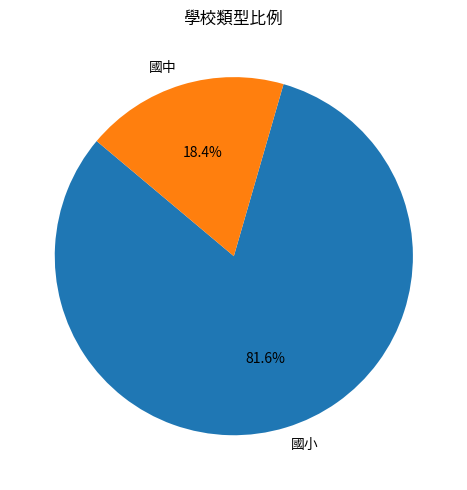

In [47]:
plt.figure(figsize=(5, 5))
plt.pie(school_type_ratios, labels=school_type_ratios.index, autopct='%1.1f%%', startangle=140)
plt.title('學校類型比例')
plt.tight_layout()

# Show the plot
plt.show()

### Q5. 各縣市的原住民學生佔比為何？

In [51]:
# Step 1: Calculate the estimated number of indigenous students in each school
df['原住民學生數量'] = (df['男學生數'] + df['女學生數']) * df['原住民學生比率'] / 100

# Step 2: Summing the indigenous students' counts per city
indigenous_students_by_city = df.groupby('縣市名稱')['原住民學生數量'].sum()

# Step 3: Calculating the total number of students per city
total_students_by_city = df.groupby('縣市名稱')[['男學生數', '女學生數']].sum().sum(axis=1)

# Step 4: Calculating the proportion of indigenous students per city
indigenous_proportion_by_city = (indigenous_students_by_city / total_students_by_city) * 100

# This will give you a Series where the index is the city name ('縣市名稱'), and the value is the proportion of indigenous students in that city.
for name, ratio in indigenous_proportion_by_city.items():
  print(f"{name} 的原住民學生數佔全縣市的 {ratio:.2f} %")


南投縣 的原住民學生數佔全縣市的 28.60 %
嘉義縣 的原住民學生數佔全縣市的 6.95 %
宜蘭縣 的原住民學生數佔全縣市的 72.07 %
屏東縣 的原住民學生數佔全縣市的 26.99 %
彰化縣 的原住民學生數佔全縣市的 1.07 %
新北市 的原住民學生數佔全縣市的 6.48 %
新竹縣 的原住民學生數佔全縣市的 36.85 %
桃園市 的原住民學生數佔全縣市的 32.14 %
澎湖縣 的原住民學生數佔全縣市的 1.24 %
臺中市 的原住民學生數佔全縣市的 9.46 %
臺南市 的原住民學生數佔全縣市的 1.40 %
臺東縣 的原住民學生數佔全縣市的 63.92 %
花蓮縣 的原住民學生數佔全縣市的 64.65 %
苗栗縣 的原住民學生數佔全縣市的 18.71 %
連江縣 的原住民學生數佔全縣市的 2.62 %
金門縣 的原住民學生數佔全縣市的 1.30 %
雲林縣 的原住民學生數佔全縣市的 1.41 %
高雄市 的原住民學生數佔全縣市的 17.93 %


### Graph for Q5

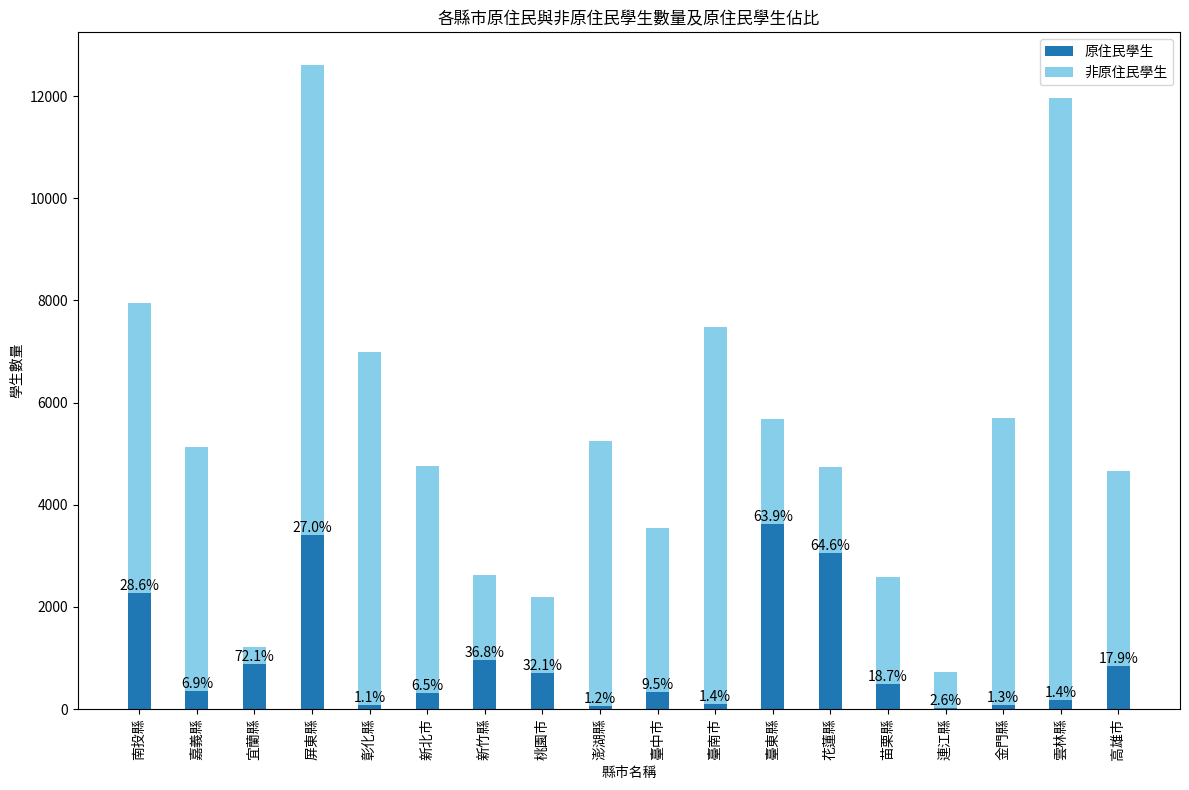

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# 計算非原住民學生數量
non_indigenous_students_by_city = total_students_by_city - indigenous_students_by_city

# 準備繪圖數據
cities = indigenous_students_by_city.index
indigenous_counts = indigenous_students_by_city.values
non_indigenous_counts = non_indigenous_students_by_city.values

# 計算原住民學生佔比
indigenous_percentages = (indigenous_counts / total_students_by_city.values) * 100

# 長條圖位置
positions = np.arange(len(cities))

# 繪製長條圖
plt.figure(figsize=(12, 8))
bars = plt.bar(positions, indigenous_counts, width=0.4, label='原住民學生')
plt.bar(positions, non_indigenous_counts, width=0.4, bottom=indigenous_counts, label='非原住民學生', color='skyblue')

# 在每條長條上添加原住民學生佔比文字
for bar, percentage in zip(bars, indigenous_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('縣市名稱')
plt.ylabel('學生數量')
plt.title('各縣市原住民與非原住民學生數量及原住民學生佔比')
plt.xticks(positions, cities, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()


### Q6. 各地區屬性（偏遠，特遠，極遠）的原住民學生佔比為？

In [60]:
# Assuming the DataFrame 'df' contains columns for male and female student numbers, indigenous student ratio, and a district attribute indicating remoteness

# Calculate the number of indigenous students in each school
df['原住民學生數量'] = (df['男學生數'] + df['女學生數']) * df['原住民學生比率'] / 100

# Aggregate the indigenous student counts based on district attribute (e.g., '偏遠', '特遠', '極遠')
indigenous_students_by_remoteness = df.groupby('地區屬性')['原住民學生數量'].sum()

# Calculate the total number of students in each category of remoteness
total_students_by_remoteness = df.groupby('地區屬性')[['男學生數', '女學生數']].sum().sum(axis=1)

# Calculate the proportion of indigenous students by category of remoteness
indigenous_student_proportion_by_remoteness = (indigenous_students_by_remoteness / total_students_by_remoteness) * 100

for howFar, ratio in indigenous_student_proportion_by_remoteness.items():
  print(f"{howFar}的學校，原住民學生佔比為：{ratio:.2f}")

偏遠的學校，原住民學生佔比為：11.94
極偏的學校，原住民學生佔比為：71.08
特偏的學校，原住民學生佔比為：38.16


### Graph for Q6

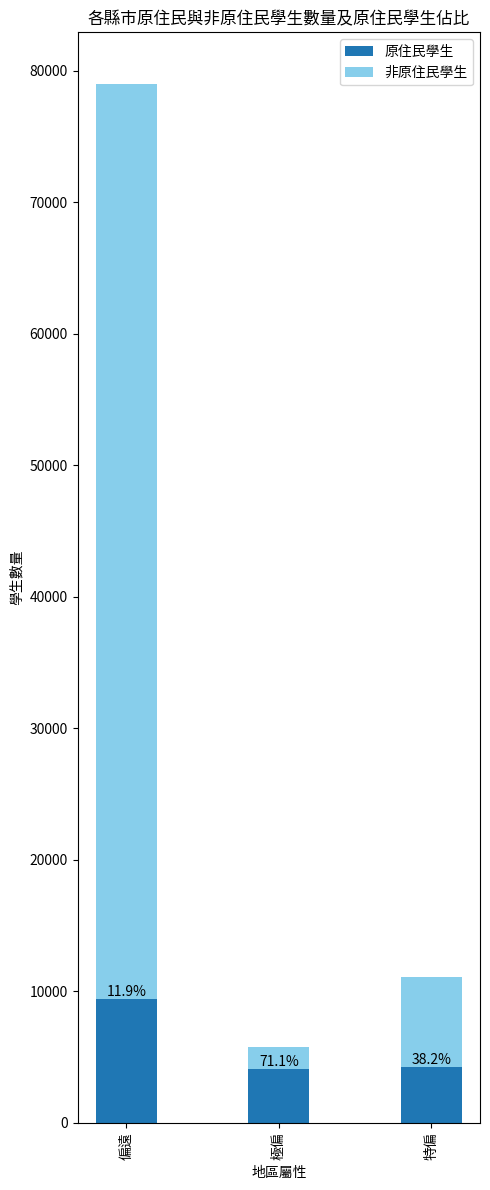

In [71]:

categories = indigenous_student_proportion_by_remoteness.index

# Data preparation
indigenous_counts = indigenous_students_by_remoteness.values
total_counts = total_students_by_remoteness.values
non_indigenous_counts = total_counts - indigenous_counts

# 計算原住民學生佔比
indigenous_percentages = (indigenous_counts / total_counts) * 100

# 長條圖位置
positions = np.arange(len(categories))

# 繪製長條圖
plt.figure(figsize=(5, 12))
bars = plt.bar(positions, indigenous_counts, width=0.4, label='原住民學生')
plt.bar(positions, non_indigenous_counts, width=0.4, bottom=indigenous_counts, label='非原住民學生', color='skyblue')

# 在每條長條上添加原住民學生佔比文字
for bar, percentage in zip(bars, indigenous_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('地區屬性')
plt.ylabel('學生數量')
plt.title('各縣市原住民與非原住民學生數量及原住民學生佔比')
plt.xticks(positions, categories, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()
